<a href="https://colab.research.google.com/github/RahulKumarSahDepp/Amazon-Sales-Price-Optimization-GBR-Algorithm/blob/main/Amazon_Sales_Pricing_Optimization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Importing the Required Libararies**


In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay,mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor


## **Loading the Dataset**

In [9]:
df = pd.read_csv('/content/amazon_products_sales_data_cleaned.csv')

## **Understanding the DataFrame**

In [10]:
df.head(3)

,product_title,product_rating,total_reviews,purchased_last_month,discounted_price,original_price,is_best_seller,is_sponsored,has_coupon,buy_box_availability,delivery_date,sustainability_tags,product_image_url,product_page_url,data_collected_at,product_category,discount_percentage
0,BOYA BOYALINK 2 Wireless Lavalier Microphone f...,4.6,375.0,300.0,89.68,159.00,No Badge,Sponsored,Save 15% with coupon,Add to cart,2025-09-01,Carbon impact,https://m.media-amazon.com/images/I/71pAqiVEs3...,https://www.amazon.com/sspa/click?ie=UTF8&spc=...,2025-08-21 11:14:29,Phones,43.60
1,"LISEN USB C to Lightning Cable, 240W 4 in 1 Ch...",4.3,2457.0,6000.0,9.99,15.99,No Badge,Sponsored,No Coupon,Add to cart,2025-08-29,NaN,https://m.media-amazon.com/images/I/61nbF6aVIP...,https://www.amazon.com/sspa/click?ie=UTF8&spc=...,2025-08-21 11:14:29,Laptops,37.52
2,"DJI Mic 2 (2 TX + 1 RX + Charging Case), Wirel...",4.6,3044.0,2000.0,314.00,349.00,No Badge,Sponsored,No Coupon,Add to cart,2025-09-01,NaN,https://m.media-amazon.com/images/I/61h78MEXoj...,https://www.amazon.com/sspa/click?ie=UTF8&spc=...,2025-08-21 11:14:29,Laptops,10.03


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   product_title         10886 non-null  object 
 1   product_rating        10840 non-null  float64
 2   total_reviews         10840 non-null  float64
 3   purchased_last_month  8833 non-null   float64
 4   discounted_price      10451 non-null  float64
 5   original_price        10451 non-null  float64
 6   is_best_seller        10886 non-null  object 
 7   is_sponsored          10886 non-null  object 
 8   has_coupon            10886 non-null  object 
 9   buy_box_availability  7381 non-null   object 
 10  delivery_date         7937 non-null   object 
 11  sustainability_tags   1128 non-null   object 
 12  product_image_url     10886 non-null  object 
 13  product_page_url      10240 non-null  object 
 14  data_collected_at     10885 non-null  object 
 15  product_category   

In [12]:
print(df[['discounted_price', 'original_price', 'product_rating', 'total_reviews', 'discount_percentage']].describe())

       discounted_price  original_price  product_rating  total_reviews  \
count      10451.000000    10451.000000    10840.000000    10840.00000   
mean         179.888563      189.254476        4.449345     5476.83690   
std          362.806696      374.225699        0.302317    22351.92857   
min            2.160000        2.160000        1.000000        1.00000   
25%           27.020000       29.990000        4.300000      171.00000   
50%           69.990000       79.990000        4.500000      791.00000   
75%          177.870000      179.990000        4.700000     3695.75000   
max         5449.000000     5449.000000        5.000000   865598.00000   

       discount_percentage  
count         10450.000000  
mean              6.446678  
std              11.924520  
min               0.000000  
25%               0.000000  
50%               0.000000  
75%               9.120000  
max              85.420000  


In [13]:
print(df['is_best_seller'].value_counts(normalize=True))
print(df['is_sponsored'].value_counts(normalize=True))
print(df['has_coupon'].value_counts(normalize=True))

is_best_seller
No Badge             0.963623
Best Seller          0.019199
Amazon's             0.016627
Limited time deal    0.000551
Name: proportion, dtype: float64
is_sponsored
Organic      0.796344
Sponsored    0.203656
Name: proportion, dtype: float64
has_coupon
No Coupon                                    0.945526
Save $16.00  with coupon                     0.019383
Save 15%  with coupon                        0.018097
Save 5%  with coupon                         0.004409
Save 10%  with coupon                        0.002756
Save $11.00  with coupon                     0.002572
Save $10.00  with coupon                     0.001286
Save $20.00  with coupon                     0.000551
Save $15.00  with coupon                     0.000367
Save $1.00  with coupon                      0.000367
Save $30.00  with coupon                     0.000367
Save 20%  with coupon                        0.000367
Save $4.00  with coupon                      0.000367
Save $18.00  with coupon     

## **EDA**

### Univariate Analysis
- Price Distribution and Outliers
- Quality Metrics Distributions

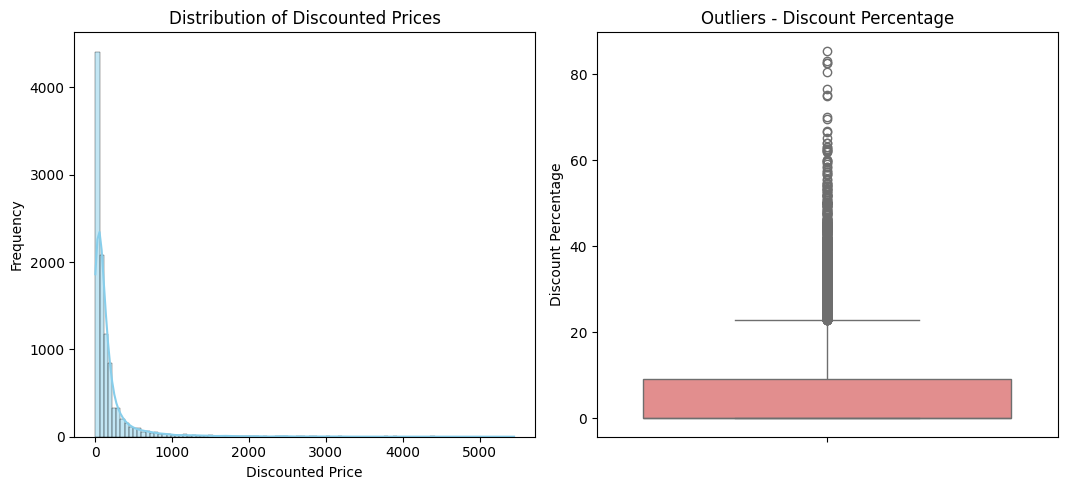

In [14]:
# we will have look at the spread of dicounted_price and identify common pricing tiers
plt.figure(figsize=(16, 5))

#Histogram Plot - Discounted Price
plt.subplot(1, 3, 1)
sns.histplot(df['discounted_price'].dropna(), bins = 100, kde = True, color = 'skyblue')
plt.title("Distribution of Discounted Prices")
plt.xlabel("Discounted Price")
plt.ylabel("Frequency")

#Box Plot - Indentify Outliers
plt.subplot(1, 3, 2)
sns.boxplot(y = df['discount_percentage'].dropna(), color = "lightcoral")
plt.title("Outliers - Discount Percentage")
plt.ylabel("Discount Percentage")

plt.tight_layout()
plt.show()

- The Discounted Price Column is following power law distribution so we can transform it to normal/gaussian distribution by using Box-Cox tranformation

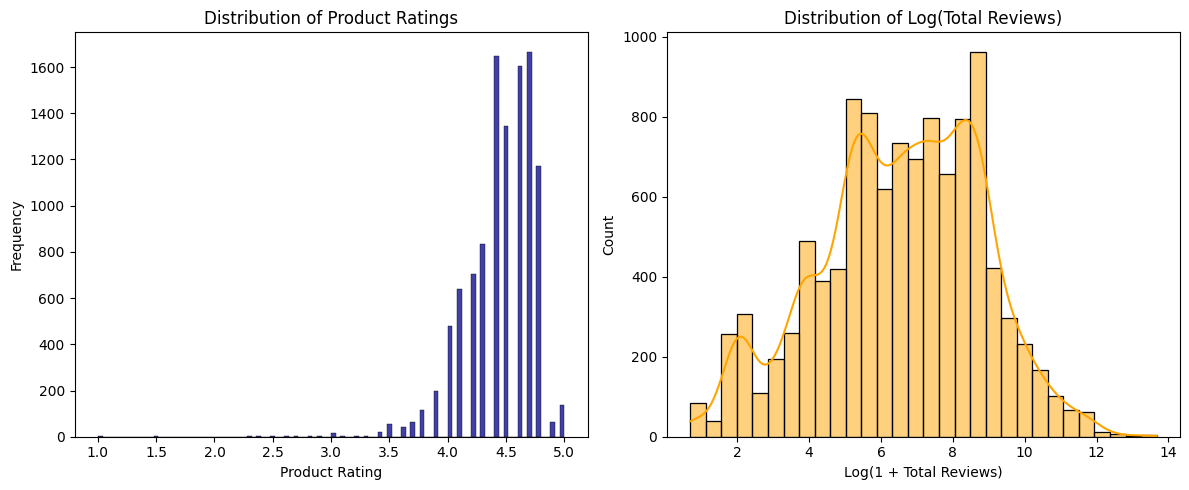

In [15]:
#Now we will be checking if the rating and reviews are clustered
plt.figure(figsize=(12, 5))

#Rating Distribution
plt.subplot(1, 2, 1)
sns.histplot(df['product_rating'].dropna(), bins = 100, kde = False, color='darkblue')
plt.title("Distribution of Product Ratings")
plt.xlabel("Product Rating")
plt.ylabel("Frequency")

#Reviews Distribution
plt.subplot(1, 2, 2)
sns.histplot(np.log1p(df['total_reviews'].dropna()), bins=30, kde=True, color='orange')
plt.title('Distribution of Log(Total Reviews)')
plt.xlabel('Log(1 + Total Reviews)')

plt.tight_layout()
plt.show()

- Product Rating is left Skewed

## **Bivariate Analysis**
- Price vs. Sales
- Discount vs. Sales Effectiveness

#### create a column "log_purchased_last_month"
- log_purchased_last_month is log transformation of sales volume column, purchased_last_month
- $\text{log1p}(x) = \log_e(1+x)$). this is the formula for log transformation

In [16]:
df['log_purchased_last_month'] = np.log1p(df['purchased_last_month'])

In [17]:
print(df[['purchased_last_month', 'log_purchased_last_month']].head())

   purchased_last_month  log_purchased_last_month
0                 300.0                  5.707110
1                6000.0                  8.699681
2                2000.0                  7.601402
3               10000.0                  9.210440
4               10000.0                  9.210440


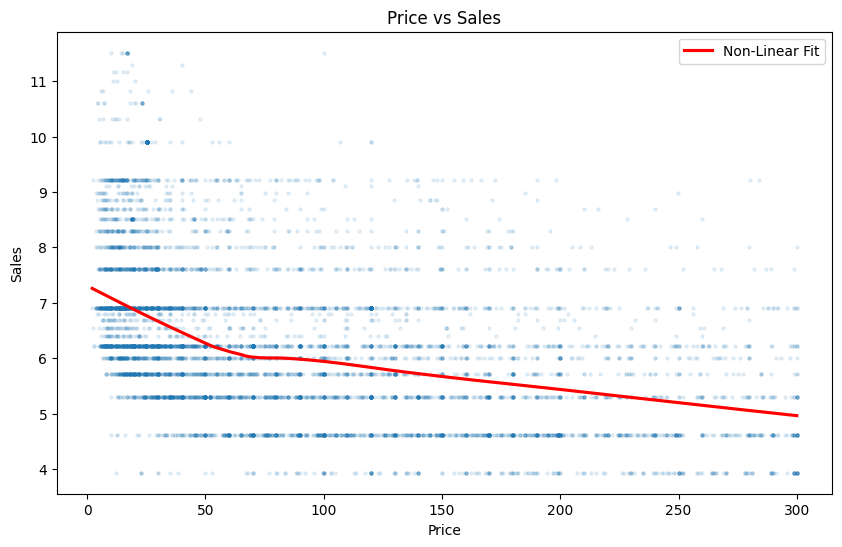

In [18]:
# Price vs Sales
price_range = df[df['discounted_price'] < 300].dropna(subset = ['log_purchased_last_month'])
plt.figure(figsize = (10, 6))

sns.regplot(
    x = 'discounted_price',
    y = 'log_purchased_last_month',
    data = price_range,
    scatter_kws={'alpha':0.1, 's':5},
    lowess = True, #Non linear fit(helps uncover complex demand curves)
    line_kws={'color':'red', 'label': 'Non-Linear Fit'}
)
plt.title('Price vs Sales')
plt.xlabel('Price')
plt.ylabel('Sales')
plt.legend()
plt.show()

#### Key Insights:
- Price and demand show a clear inverse relationship → cheaper products sell more.
- The big demand drop happens in the low price range(<100)
- Beyond 150, demand becomes more stable, indicating higher-priced items target a loyal or niche segment.

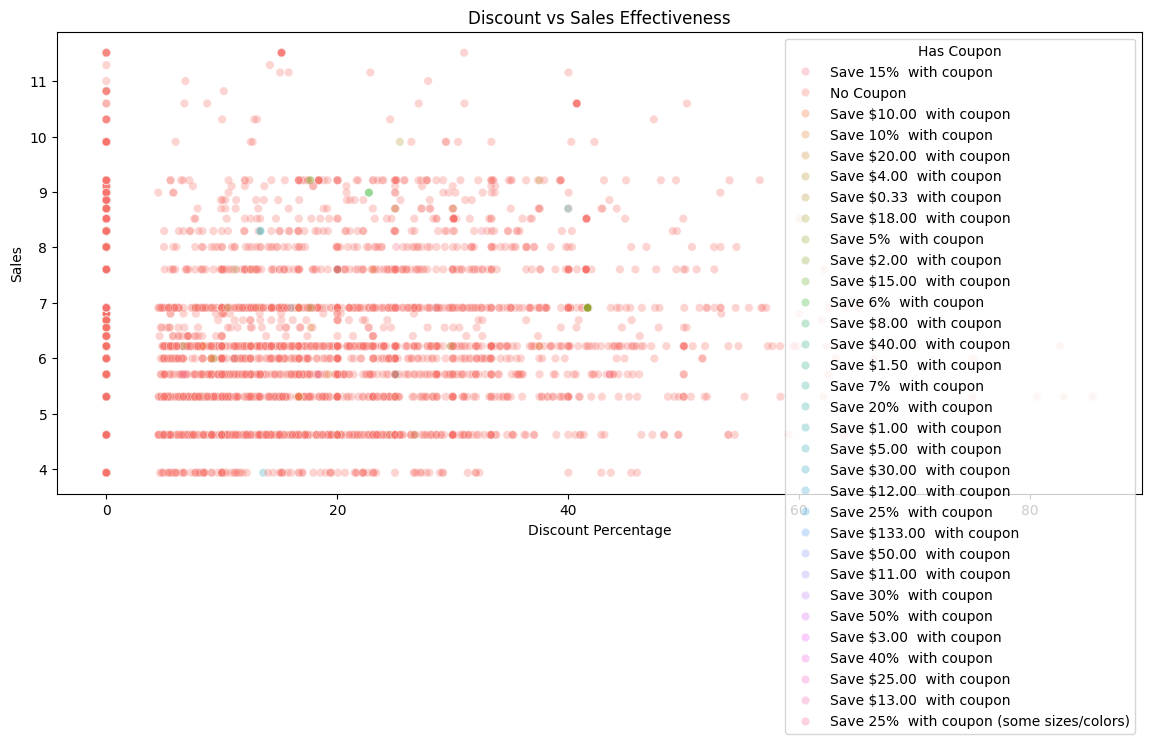

In [19]:
#discount vs sales effectiveness
plt.figure(figsize = (14, 6))
sns.scatterplot(
    x='discount_percentage',
    y='log_purchased_last_month',
    hue = 'has_coupon',
    data = df.dropna(subset = ['discount_percentage', 'log_purchased_last_month']),
    alpha = 0.3,
)
plt.title('Discount vs Sales Effectiveness')
plt.xlabel('Discount Percentage')
plt.ylabel('Sales')
plt.legend(title = 'Has Coupon')
plt.show()

#### Key Insights:
- There is large dense at 0% discount, means there is large no. of product sell even without discount. This shows the discount is not only the driver of the sell
- No stronger relationship is seen between the sales and the discount. Even when the discount is higher than 40% the sales is similar(5-8) units.
- Presence of a coupon doesn’t necessarily lead to higher sales.
- sells ceilling effect is seen. Most sales stay between 4 and 9 units, even when discount increases.


#### **Multivariate Analysis**
- How do price changes affect sales for high-quality vs low-quality
- correlation Matrix heat map

<Figure size 1000x600 with 0 Axes>

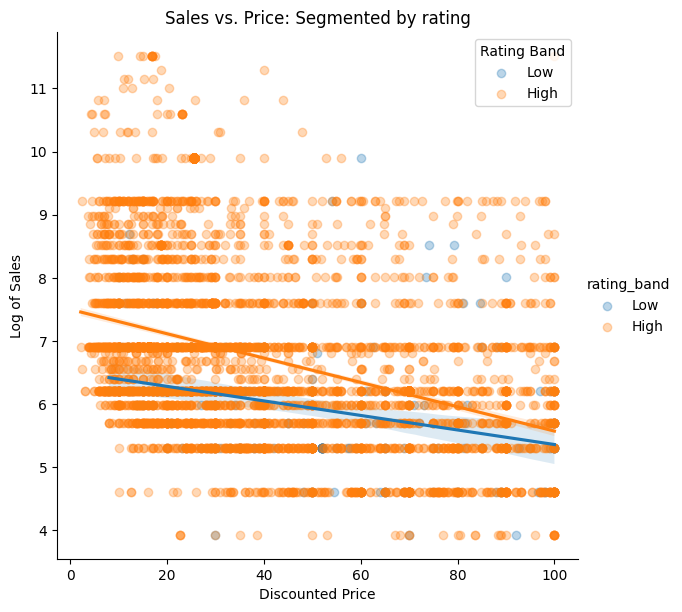

In [23]:
# price sells curve by rating bands
#create high/low rating bins
df['rating_band'] = pd.cut(
    df['product_rating'],
    bins = [0, 4.0, 5.0],
    labels = ['Low', 'High'],
    right = True
)

plt.figure(figsize = (10, 6))
sns.lmplot(
    x = 'discounted_price',
    y = 'log_purchased_last_month',
    hue = 'rating_band',
    data = df[df['discounted_price'] < 100].dropna(subset = ['log_purchased_last_month']),
    scatter_kws={'alpha': 0.3},
    height=6
)

plt.title("Sales vs. Price: Segmented by rating")
plt.xlabel("Discounted Price")
plt.ylabel("Log of Sales")
plt.legend(title = "Rating Band")
plt.show()

##### Key Insights
- As discounted price increases, log of sales decreases(low price products, sells is high)
- customer prefer higher rated products even if it is slightly coustlier
- Cheap and highly-rated products sell the most. Increasing price reduces sales, but the impact is stronger for high-rated items, though they still outsell low-rated ones overall.


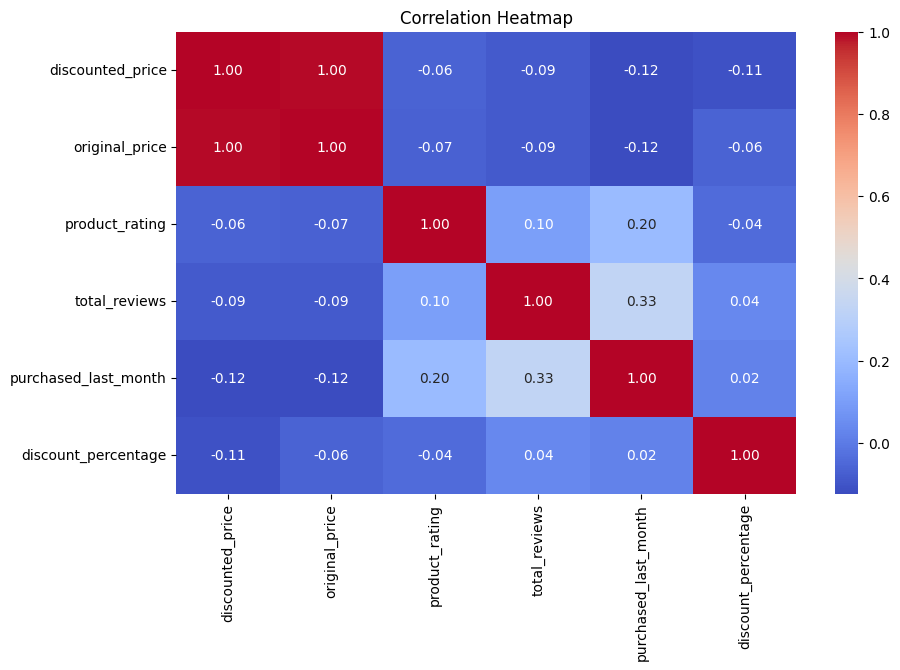

In [25]:
# Correlation HeatMap
numerical_cols = [
    'discounted_price', 'original_price', 'product_rating', 'total_reviews',
    'purchased_last_month', 'discount_percentage'
]

# Select only these columns from df
corr_df = df[numerical_cols]

# Now compute correlation
correlation_matrix = corr_df.corr()

plt.figure(figsize = (10, 6))
sns.heatmap(correlation_matrix, annot = True, cmap = 'coolwarm', fmt = '.2f')
plt.title("Correlation Heatmap")
plt.show()


###### Key Insights
- The correlation between the total reviews and purchased last month columnis highly positive, idicates that products with a high volume of customer feedback tend to sell significantly more.
- Product quality, as measured by rating, has a moderate positive impact on sales
- Both discounted_price and original_price show a weak negative correlation with sales. This suggests that while lower prices do lead to higher sales (a typical demand curve), the effect is minor compared to product reputation metrics (reviews/rating).
- The magnitude of the discount itself has almost no direct linear correlation with sales volume. This is surprising and it indicates that the market is inelastic regarding discounts.
- discounted_price and original_price are perfectly correlated.So, we will use only on of these columns.
- There is a very weak positive correlation between product rating and the total number of reviews. This implies that having many reviews does not necessarily guarantee a perfect rating, and vice versa.

## **Categorical Analaysis**

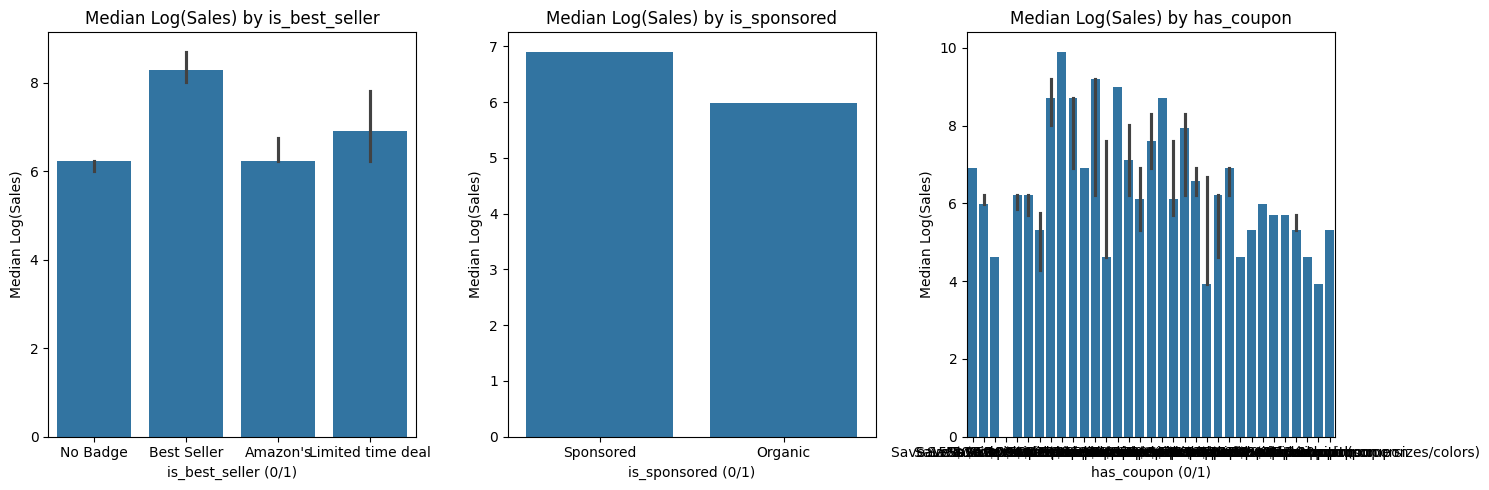

In [28]:
categories = ['is_best_seller', 'is_sponsored', 'has_coupon']

plt.figure(figsize=(15, 5))

for i, col in enumerate(categories):
    plt.subplot(1, 3, i + 1)
    # Use median to resist outliers from sales data
    sns.barplot(x=col, y='log_purchased_last_month', data=df, estimator=np.median)
    plt.title(f'Median Log(Sales) by {col}')
    plt.xlabel(f'{col} (0/1)')
    plt.ylabel('Median Log(Sales)')

plt.tight_layout()
plt.show()


#### Key Insights
###### **BY is_best_seller**
- The "Best Seller" category has the highest Median sales (around 8.3), significantly higher than "No Badge" (around 6.3).
- The products tagged with a deal (around 7.0) show a clear sales advantage over those with "No Badge" (6.3), confirming that a deal badge alone provides a lift.
- : Achieving "Best Seller" status creates a positive feedback loop—the status dramatically accelerates sales, justifying aggressive tactics (like temporary price drops) to attain the badge.
###### **BY is_sponsered**
- Investing in sponsorship is an effective strategy to boost sales volume, especially for newer products without established review counts.
###### **BY has_coupon**
- The specific coupon types associated with a median Log(Sales) near 9 or 10 are highly effective, potentially due to the visibility of the coupon badge combined with a high discount value.

## Outliers and Anomaly Analysis

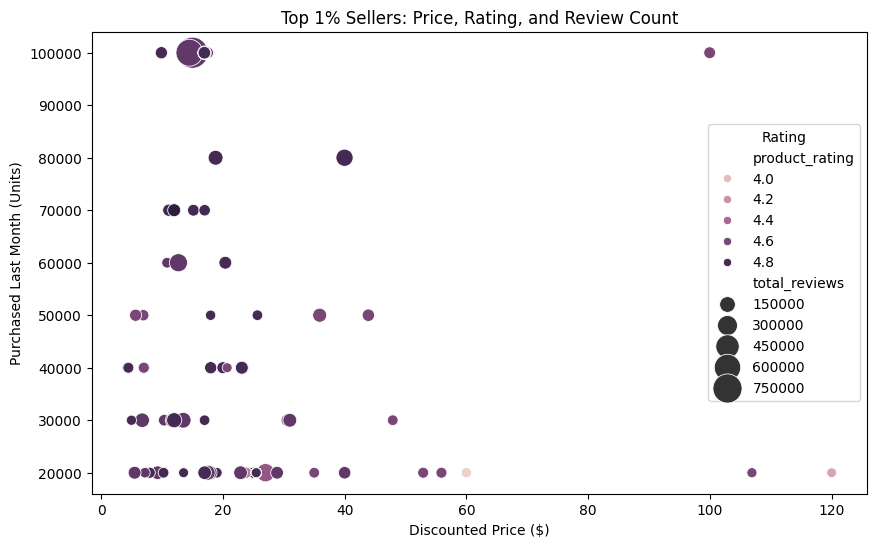

In [29]:
# Identify the top 1% of sales for investigation
sales_threshold = df['purchased_last_month'].quantile(0.99)
top_sellers = df[df['purchased_last_month'] >= sales_threshold].copy()

plt.figure(figsize=(10, 6))
sns.scatterplot(
    x='discounted_price',
    y='purchased_last_month',
    hue='product_rating',
    size='total_reviews',
    data=top_sellers,
    sizes=(50, 500)
)
plt.title('Top 1% Sellers: Price, Rating, and Review Count')
plt.xlabel('Discounted Price ($)')
plt.ylabel('Purchased Last Month (Units)')
plt.legend(title='Rating')
plt.show()

- **Dominant zone**: Nearly all top-performing products, including those with sales over 50K units, are priced under $50.
- There is a single high-priced product (around $105) that has achieved 100,000 units in sales.This represents a product category with very little competition, a necessity (monopoly), or a high-demand item that is simply expensive to produce.
- To achieve mass market success (high units), Amazon products must be affordably priced ($<\$40$) and possess an overwhelming amount of positive customer reviews.

## **Feature Scaling and train test split**

In [39]:

#is_best_seller: Convert status strings to 1/0
# This handles 'No Badge' and other potential non-Best Seller strings.
df['is_best_seller'] = df['is_best_seller'].apply(
    lambda x: 1 if x == 'Best Seller' else 0
)

# is_sponsored: Convert status strings to 1/0
# Assuming 'Organic' is the non-sponsored status.
df['is_sponsored'] = df['is_sponsored'].map({
    'Sponsored': 1,
    # Convert any other string (like 'Organic') to 0
    'Organic': 0
}).fillna(0).astype(int)

# 3. has_coupon: Convert status strings to 1/0
# Convert any text indicating a coupon to 1, and 'No Coupon' to 0.
df['has_coupon'] = df['has_coupon'].apply(
    lambda x: 0 if x == 'No Coupon' else 1
)

df['product_rating'] = pd.to_numeric(df['product_rating'], errors='coerce')
df['total_reviews'] = pd.to_numeric(df['total_reviews'], errors='coerce')


print("Categorical features successfully encoded to 1s and 0s.")
print(df[['is_best_seller', 'is_sponsored', 'has_coupon']].value_counts())
print("\nProceed to re-run Phase 1 (Data Splitting/Scaling) then Phase 2 (Model Training).")

Categorical features successfully encoded to 1s and 0s.
is_best_seller  is_sponsored  has_coupon
0               0             0             8346
                1             0             1745
                              1              466
1               0             0              196
0               0             1              120
1               0             1                7
                1             0                6
Name: count, dtype: int64

Proceed to re-run Phase 1 (Data Splitting/Scaling) then Phase 2 (Model Training).


In [40]:
# The target variable is the log-transformed sales volume.
TARGET = 'log_purchased_last_month'
y = df[TARGET]

print(f"Target Variable (y): {TARGET}")

Target Variable (y): log_purchased_last_month


In [41]:
# Features selected based on high correlation with sales and relevance to pricing strategy.
FEATURES = [
    # Pricing Features (Essential for demand curve)
    'discounted_price',

    # Reputation/Quality Features (Strongest sales drivers)
    'total_reviews',
    'product_rating',

    # Promotional Status Features (Provide significant sales lift)
    'is_best_seller',
    'is_sponsored',
    'has_coupon',

    # Discount Feature (Kept to test non-linear effects in GBR)
    'discount_percentage'
]

# Create the feature matrix
X = df[FEATURES]

# Note: The redundant 'original_price' column has been intentionally excluded.
print(f"Feature Set (X) defined with {len(FEATURES)} columns.")

Feature Set (X) defined with 7 columns.


In [42]:
# Combine X and y into a temporary DataFrame to drop rows where any value is NaN.
data_model = pd.concat([X, y], axis=1).dropna()

# Reassign X and y using the cleaned data
X_clean = data_model[FEATURES]
y_clean = data_model[TARGET]

print(f"\nOriginal Total Rows: {df.shape[0]}")
print(f"Rows dropped due to NaNs: {df.shape[0] - data_model.shape[0]}")
print(f"Final Rows for Modeling: {X_clean.shape[0]}")


Original Total Rows: 10886
Rows dropped due to NaNs: 2481
Final Rows for Modeling: 8405


In [43]:
from sklearn.model_selection import train_test_split

# Split the cleaned data (80% for training, 20% for testing)
X_train, X_test, y_train, y_test = train_test_split(
    X_clean, y_clean, test_size=0.2, random_state=42
)

print(f"\nTraining set size: {X_train.shape[0]} samples.")
print(f"Testing set size: {X_test.shape[0]} samples.")


Training set size: 6724 samples.
Testing set size: 1681 samples.


#### Standardization

In [44]:
continuous_features = [
    'discounted_price',
    'total_reviews',
    'product_rating',
    'discount_percentage'
]
scaler = StandardScaler()
X_train[continuous_features] = scaler.fit_transform(X_train[continuous_features])
X_test[continuous_features] = scaler.transform(X_test[continuous_features])
print("\nContinuous features scaled (Standardized). Data is ready for modeling.")


Continuous features scaled (Standardized). Data is ready for modeling.


## **Model Building**
- we will initialize three models

##### What is Inverse Transform Prediction?

You need this when you scaled/normalized your target variable before training—for example using:

-  StandardScaler
-  MinMaxScaler
-  Log Transform
-  Power transforms

After scaling, the model predicts in scaled units, not original numbers.
So you must inverse transform to convert predictions back into real-world values.
##### Why this is important:

- If you calculate MAE on scaled predictions, the error won't make sense.
You must inverse transform first, then compute MAE.

In [47]:
models = {
    'Ridge Regression':Ridge(random_state=42),
    'Random Forest':RandomForestRegressor(n_estimators=100,random_state=42, n_jobs =-1),
    'Gradient Boosting':GradientBoostingRegressor(random_state=42)
}

results ={}

for name, model in models.items():
  print(f"Training {name}...")
  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)

  # 1. Inverse Transform predictions for MAE (get sales back into original units)
  y_test_org = np.expm1(y_test)
  y_pred_org = np.expm1(y_pred)

  # 2. Evaluation metrics
  r2 = r2_score(y_test_org, y_pred_org)
  mae = mean_absolute_error(y_test_org, y_pred_org)
  print(f"{name} - R2: {r2:.4f}, MAE: {mae:.2f} units")

  results[name] = {'R2':r2, 'MAE':mae}

#Indentify the Best Model:
best_model = max(results, key=lambda k: results[k]['R2'])
best_model_r2 = results[best_model]['R2']
best_model_mae = results[best_model]['MAE']

print(f"\n----------------------------------------------------")
print(f"🏆 **Best Performing Model (by R²): {best_model}**")
print(f"R²: {best_model_r2:.4f}, MAE: {best_model_mae:.2f} units")
print(f"----------------------------------------------------")

Training Ridge Regression...
Ridge Regression - R2: -2.6568, MAE: 1986.25 units
Training Random Forest...
Random Forest - R2: 0.4719, MAE: 1015.82 units
Training Gradient Boosting...
Gradient Boosting - R2: 0.4310, MAE: 1112.82 units

----------------------------------------------------
🏆 **Best Performing Model (by R²): Random Forest**
R²: 0.4719, MAE: 1015.82 units
----------------------------------------------------


- We have got Random Forest as the best model to be trained but as we can see Gradient Boosting is quite close and GBR fits good for complex and non-linearity data. we will fine tune GBR model now to produce more precise results

In [49]:
model_to_tune = GradientBoostingRegressor(random_state=42)

param_dist ={
    'n_estimators': [100, 200, 300, 400],         # Number of boosting stages/trees
    'learning_rate': [0.01, 0.05, 0.1, 0.2],      # Controls the contribution of each tree
    'max_depth': [3, 4, 5, 6, 7],                 # Depth of the individual regression estimators
    'subsample': [0.7, 0.8, 0.9, 1.0],            # Fraction of samples used for fitting base learners
    'min_samples_split': [2, 5, 10]               # Minimum number of samples required to split an internal node
}

#Initialize and run randomized search
random_search = RandomizedSearchCV(
    estimator=model_to_tune,
    param_distributions=param_dist,
    n_iter=30, # Number of parameter settings that are sampled
    cv=3,
    scoring='r2',
    verbose=1,
    n_jobs=-1,
    random_state=42
)

print("\n--- Starting Hyperparameter Tuning for Gradient Boosting Regressor ---")
# Fit the randomized search to the training data
random_search.fit(X_train, y_train)

# Get the best model and make predictions
tuned_model = random_search.best_estimator_
tuned_y_pred_log = tuned_model.predict(X_test)

# Evaluate the tuned model
tuned_r2 = r2_score(y_test, tuned_y_pred_log)
tuned_mae = mean_absolute_error(np.expm1(y_test), np.expm1(tuned_y_pred_log))

print(f"\n Tuned Model Best Parameters: {random_search.best_params_}")
print(f" Tuned GBR Model R²: {tuned_r2:.4f} (Compare against RF's 0.4719)")
print(f" Tuned GBR Model MAE: {tuned_mae:.2f} units")


--- Starting Hyperparameter Tuning for Gradient Boosting Regressor ---
Fitting 3 folds for each of 30 candidates, totalling 90 fits

 Tuned Model Best Parameters: {'subsample': 0.9, 'n_estimators': 300, 'min_samples_split': 5, 'max_depth': 7, 'learning_rate': 0.01}
 Tuned GBR Model R²: 0.6372 (Compare against RF's 0.4719)
 Tuned GBR Model MAE: 1136.95 units


### Feature Importance Analysis

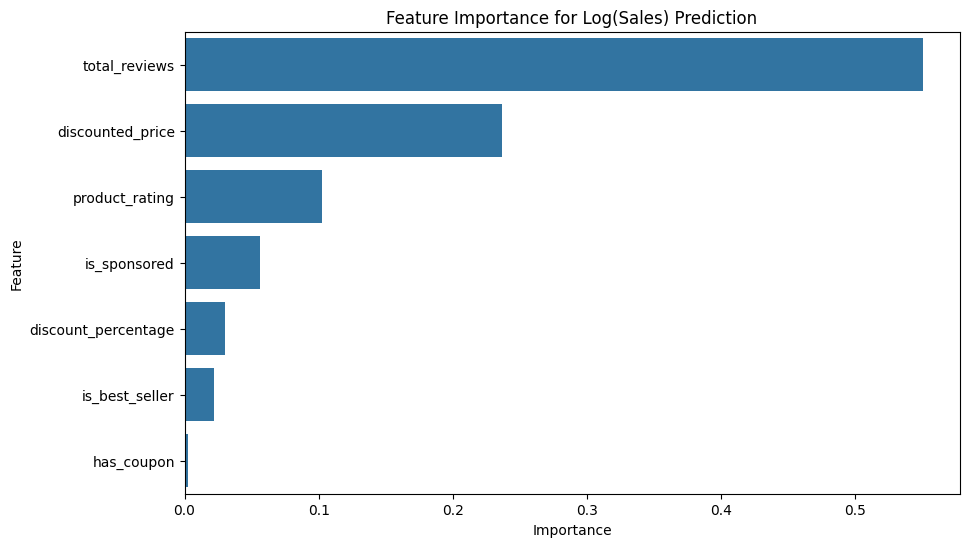

In [50]:
importances = tuned_model.feature_importances_
feature_names = X_train.columns

#Create a dataframe for visualization
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Visualize feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importance for Log(Sales) Prediction')
plt.show()


## **Optimization Strategy**: Revenue Simulation
- The true goal of optimization is to maximize (sales x price), not only the seles volume.

In [51]:
# 1. Define the simulation space
# We will test prices from $10 to $100 in $5 increments.
test_prices = np.arange(10, 105, 5)

# 2. Define the characteristics of a HYPOTHETICAL NEW PRODUCT
# Set the non-price features (reputation, status) at a high-performing level
# We must use the SCALED values for continuous features!
# Assuming 'scaler' object is available from Phase 1.

# Hypothetical Product Features (Unscaled):
hypothetical_features_unscaled = {
    'discounted_price': 50.0, # Placeholder, will be varied
    'total_reviews': 50000.0, # High Reviews
    'product_rating': 4.8,    # Excellent Rating
    'discount_percentage': 20.0, # Decent Discount
    'is_best_seller': 0,      # Not a Best Seller (yet)
    'is_sponsored': 1,        # Sponsored
    'has_coupon': 1           # Has Coupon
}

# 3. Create the Simulation DataFrame
simulation_data = []
for price in test_prices:
    # Create a test row by updating the price
    test_row = hypothetical_features_unscaled.copy()
    test_row['discounted_price'] = price
    simulation_data.append(test_row)

simulation_df = pd.DataFrame(simulation_data)

# 4. Scale the continuous features in the simulation data
continuous_features = ['discounted_price', 'total_reviews', 'product_rating', 'discount_percentage']
simulation_df_scaled = simulation_df.copy()
simulation_df_scaled[continuous_features] = scaler.transform(simulation_df[continuous_features])


--- Optimization Simulation Results ---
Optimal Price for High-Reputation, Sponsored Product: $100.00
Predicted Sales at Optimal Price: 5909 units
Maximum Predicted Revenue: $590907.47


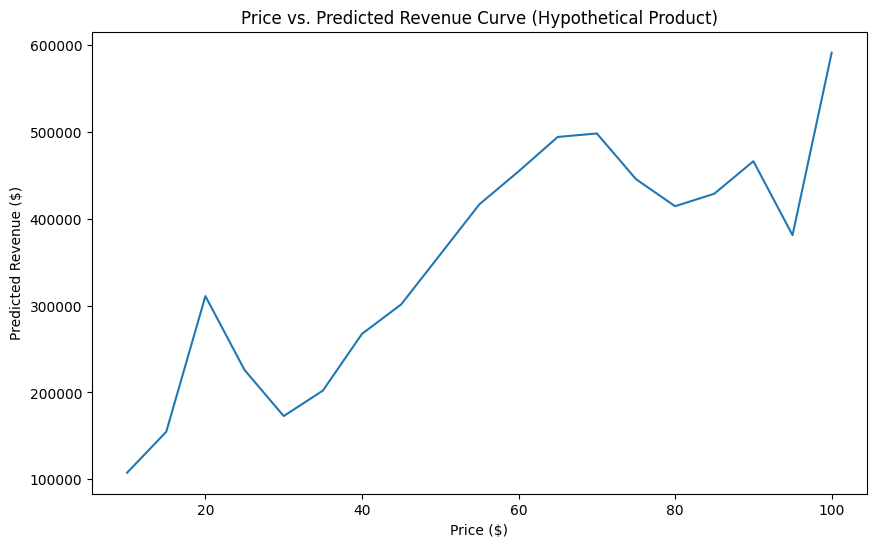

In [52]:
# 5. Predict Sales (Log Scale) using the Tuned Model
pred_log_sales = tuned_model.predict(simulation_df_scaled[feature_names])

# 6. Inverse Transform to get Units Sold
pred_sales_units = np.expm1(pred_log_sales)

# 7. Calculate Revenue
simulation_df['Predicted_Sales'] = pred_sales_units
simulation_df['Predicted_Revenue'] = simulation_df['discounted_price'] * simulation_df['Predicted_Sales']

# 8. Find the Revenue-Maximizing Price
optimal_row = simulation_df.loc[simulation_df['Predicted_Revenue'].idxmax()]

print("\n--- Optimization Simulation Results ---")
print(f"Optimal Price for High-Reputation, Sponsored Product: ${optimal_row['discounted_price']:.2f}")
print(f"Predicted Sales at Optimal Price: {optimal_row['Predicted_Sales']:.0f} units")
print(f"Maximum Predicted Revenue: ${optimal_row['Predicted_Revenue']:.2f}")

# Visualize the Price vs. Revenue Curve
plt.figure(figsize=(10, 6))
sns.lineplot(x='discounted_price', y='Predicted_Revenue', data=simulation_df)
plt.title('Price vs. Predicted Revenue Curve (Hypothetical Product)')
plt.xlabel('Price ($)')
plt.ylabel('Predicted Revenue ($)')
plt.show()